In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

# Линейная регрессия

## Оверфиттинг

[ 1.3750139   0.09732798 -0.49811466]
[  2.02209982   4.61460239 -14.54118068 -20.51417836  62.10270283
   7.9569983  -66.24073286  15.36100369  18.37465997  -6.77391287]


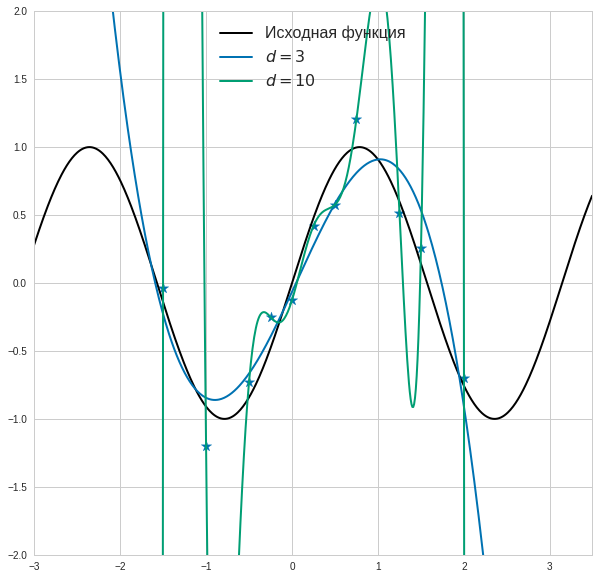

In [11]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2.5, 3, 4]) / 2
num_points = len(xd)

## Данные
data = orig(xd) + np.random.normal(0, .25, num_points)

## Для 
xs = np.arange(xd[0]-1.5, xd[-1]+1.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d = np.vstack([xd ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Исходная функция", color="black")

set_of_powers = [ 3,  10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :d], data )
    print(cur_model.coef_)
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Добавим ещё данных

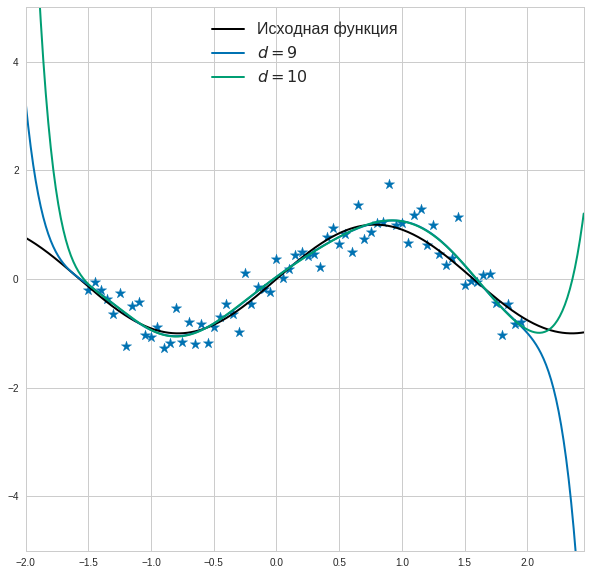

In [10]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd_large = np.arange(-1.5, 2, 0.05)
num_points_l = len(xd_large)

## Данные
data_large = orig(xd_large) + np.random.normal(0, .25, num_points_l)

## Для 
xs = np.arange(xd_large[0]-.5, xd_large[-1]+.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d_large = np.vstack([xd_large ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd_large, data_large, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Исходная функция", color="black")

set_of_powers = [ 9, 10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d_large[:, :d], data_large )
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Регуляризация

[ 0.00352616  0.00010928  0.00288977  0.00034008  0.00314274  0.00085615
  0.00373938  0.00130181  0.00371479 -0.00045031 -0.00155959]


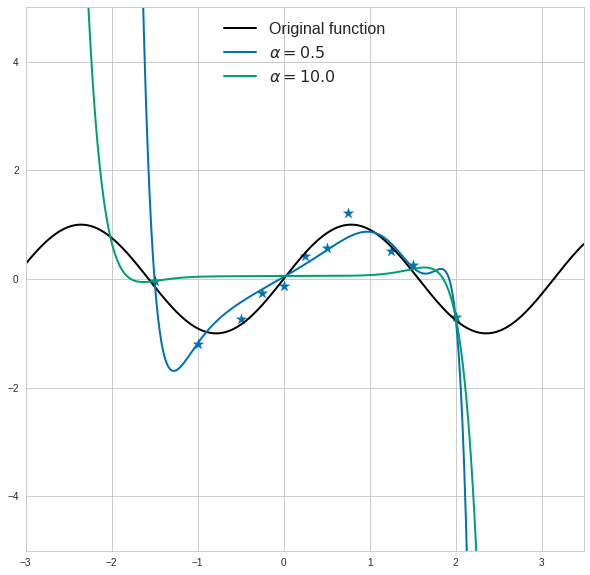

In [16]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Original function", color="black")

# m_ridge_0 = linear_model.Ridge(alpha=0.00, fit_intercept=True).fit( xd_d[:, :12], data )
# ax.plot(xs, m_ridge_0.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.0$")

# m_ridge_1 = linear_model.Ridge(alpha=0.001, fit_intercept=True).fit( xd_d[:, :12], data )
# ax.plot(xs, m_ridge_1.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.001$")

m_ridge_2 = linear_model.Ridge(alpha=0.5, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_2.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.5$")

m_ridge_3 = linear_model.Ridge(alpha=1000.0, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_3.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=10.0$")

print(m_ridge_3.coef_)

ax.legend(loc="upper center", fontsize=legend_fontsize)
plt.show()

## Усреднение

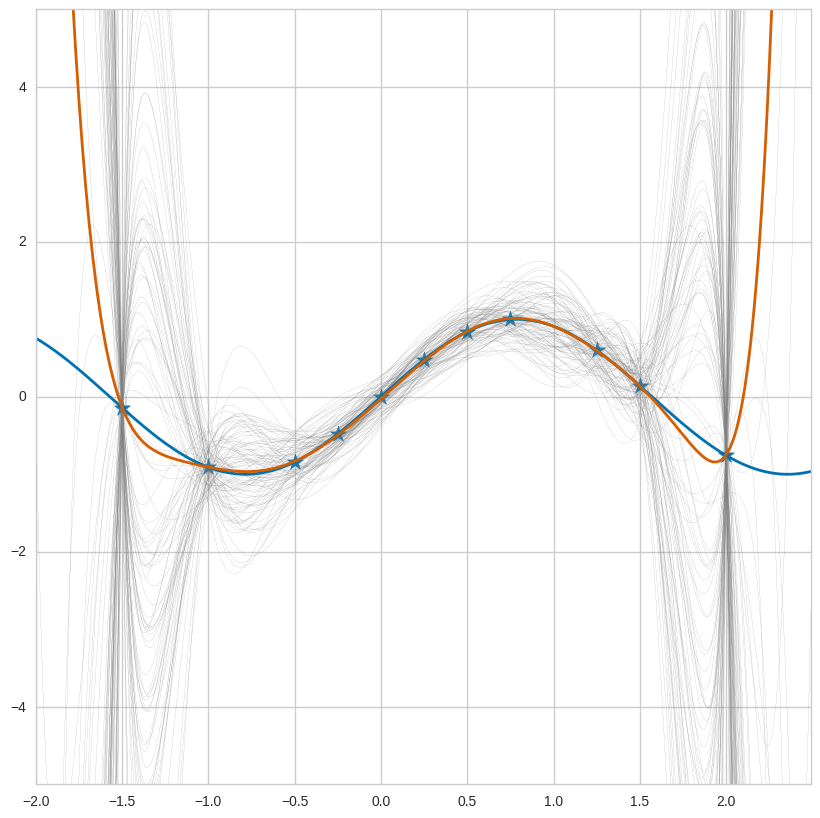

In [21]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))

res = []
for _ in range(100):
    cur_data = orig(xd) + np.random.normal(0, .25, num_points)
    cur_model = linear_model.Ridge(alpha=0.001, fit_intercept=True).fit( xd_d, cur_data )
    res.append(cur_model.predict( xs_d ))
    ax.plot(xs, res[-1], linewidth=.1, color="0.5")

ax.plot(xs, orig(xs), linewidth=2, label="Original function", color=palette[0])
ax.scatter(xd, orig(xd), marker='*', s=150, color=palette[0])

ax.plot(xs, np.mean( res, axis=0 ), linewidth=2, label="Averaged predictions", color=palette[2])
plt.show()

## Из данных "Ренессанс"

In [23]:
import pandas as pd
from collections import Counter

data = pd.read_csv("~/soft/renaissance/data.csv", sep=';')
makes = Counter( data.VEHICLE_MAKE )
print(makes)

Counter({'Kia': 11050, 'Hyundai': 9168, 'Toyota': 8866, 'Renault': 8733, 'Ford': 8127, 'Mitsubishi': 7169, 'Nissan': 6514, 'Volkswagen': 5178, 'BMW': 4744, 'Skoda': 4054, 'Audi': 2195, 'Honda': 1833, 'Opel': 1789, 'Volvo': 1744, 'Land Rover': 1674, 'Suzuki': 1611, 'Chevrolet': 1306, 'Mercedes-Benz': 1272, 'Mazda': 1225, 'Subaru': 1134, 'Ssang Yong': 939, 'Lada': 789, 'ВАЗ': 611, 'УАЗ': 496, 'Jeep': 472, 'Peugeot': 471, 'Infiniti': 369, 'Citroen': 342, 'Great Wall': 322, 'Porsche': 312, 'Lifan': 297, 'Lexus': 278, 'Fiat': 245, 'Seat': 239, 'Chery': 186, 'Geely': 133, 'Daewoo': 126, 'Cadillac': 78, 'Jaguar': 68, 'Mini': 54, 'Dodge': 52, 'ГАЗ': 42, 'Vortex': 40, 'Chrysler': 31, 'Другая марка (Иностранного производства)': 31, 'Другая марка (Отечественного производства)': 23, 'Acura': 22, 'Alfa Romeo': 15, 'Tagaz': 14, 'Brilliance': 13, 'Datsun': 12, 'Smart': 10, 'Hummer': 10, 'Faw': 9, 'BYD': 7, 'КАМАЗ': 6, 'Saab': 4, 'Wielton': 4, 'Changan': 4, 'Scania': 4, 'Daihatsu': 4, 'Haima': 4, 'DAF

In [24]:
data

DATA_TYPE  POLICY_ID  POLICY_BEGIN_MONTH  POLICY_END_MONTH  \
0         TRAIN          1                   1                 1   
1         TRAIN          2                   1                 1   
2         TRAIN          3                   1                 1   
3         TRAIN          4                   1                 1   
4         TRAIN          5                   1                 1   
5         TRAIN          6                   2                 1   
6         TRAIN          7                   1                 1   
7         TRAIN          8                   2                 2   
8         TRAIN          9                   1                 1   
9         TEST          10                   2                 2   
10        TRAIN         11                   1                 1   
11        TEST          12                   1                 1   
12        TEST          13                   1                 1   
13        TRAIN         14                   1                 1   
14        TRAIN         15                   2                 2   
15        TRAIN         16                   1                 1   
16        TRAIN         17                   1                 1   
17        TRAIN         18                   1                 1   
18        TRAIN         19                   1                 1   
19        TRAIN         20                   1                 1   
20        TRAIN         21                   2                 2   
21        TEST          22                   1                 1   
22        TRAIN         23                   1                 1   
23        TRAIN         24                   1                 1   
24        TRAIN         25                   2                 2   
25        TRAIN         26                   1                 1   
26        TRAIN         27                   1                 1   
27        TRAIN         28                   1                 1   
28        TRAIN         29                   2                 2   
29        TRAIN         30                  11                11   
...         ...        ...                 ...               ...   
96575     TRAIN      96576                   1                 1   
96576     TEST       96577                   1                 1   
96577     TRAIN      96578                   2                 2   
96578     TRAIN      96579                   9                 9   
96579     TRAIN      96580                   9                 9   
96580     TRAIN      96581                   2                 2   
96581     TRAIN      96582                   1                 1   
96582     TRAIN      96583                   2                 2   
96583     TRAIN      96584                   2                 2   
96584     TRAIN      96585                   2                 2   
96585     TEST       96586                   2                 2   
96586     TRAIN      96587                   2                 2   
96587     TRAIN      96588                   2                 2   
96588     TRAIN      96589                   2                 2   
96589     TRAIN      96590                   2                 2   
96590     TRAIN      96591                   3                 2   
96591     TRAIN      96592                   1                 1   
96592     TRAIN      96593                   1                 1   
96593     TRAIN      96594                   2                 2   
96594     TEST       96595                   2                 2   
96595     TRAIN      96596                   2                 2   
96596     TRAIN      96597                   3                 3   
96597     TEST       96598                   3                 3   
96598     TRAIN      96599                   3                 3   
96599     TRAIN      96600                   3                 3   
96600     TRAIN      96601                   3                 3   
96601     TRAIN      96602                   4                

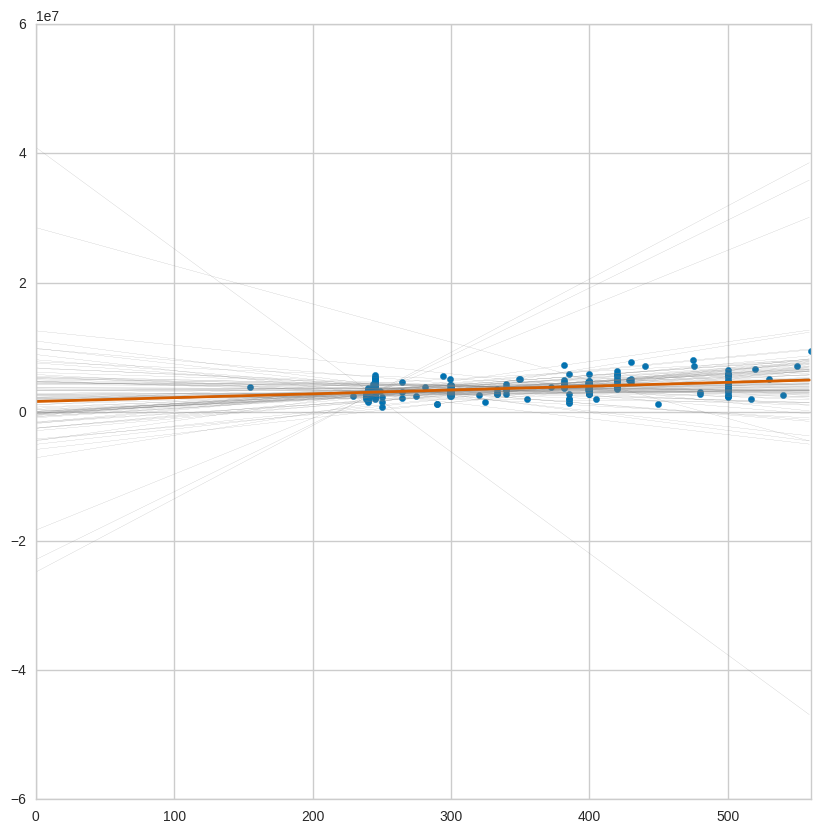

In [26]:
def plot_power_by_make(key, N=100, share=0.1):
    indices = (data.VEHICLE_MAKE == key)
    x_max = max(data.VEHICLE_ENGINE_POWER[indices])
    data_X, data_Y = np.asmatrix(np.array(data.VEHICLE_ENGINE_POWER[indices])).transpose(), np.array(data.VEHICLE_SUM_INSURED[indices])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_xlim((0, x_max))
    ax.scatter(data.VEHICLE_ENGINE_POWER[indices], data.VEHICLE_SUM_INSURED[indices], color=palette[0])

    for _ in range(N):
        random_indices = np.random.choice(range(data_X.shape[0]), int(data_X.shape[0] * share))
        model = linear_model.LinearRegression(fit_intercept=True).fit( data_X[random_indices, :], data_Y[random_indices] )
        xs = np.arange(0, x_max, 1.0)
        ax.plot(xs, model.predict(np.asmatrix(xs).transpose()), linewidth=.1, color="0.5")
    
    model = linear_model.LinearRegression(fit_intercept=True).fit( data_X, data_Y )
    ax.plot(xs, model.predict(np.asmatrix(xs).transpose()), linewidth=2, color=palette[2])
    plt.show()

plot_power_by_make('Porsche', share=.01)